In [1]:
import re
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [2]:
# Loading Amazon file
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/amazon_cells_labelled.txt',sep='\t',header=None)
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.columns = ['reviews','neg_rating']
df = df[['neg_rating','reviews']]

In [3]:
pd.options.display.max_colwidth = 500
df[df['neg_rating']==0]

,neg_rating,reviews
0,0,So there is no way for me to plug it in here in the US unless I go by a converter.
3,0,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
5,0,I have to jiggle the plug to get it to line up right to get decent volume.
6,0,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one."
8,0,"Needless to say, I wasted my money."
9,0,What a waste of money and time!.
12,0,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
14,0,"The design is very odd, as the ear ""clip"" is not very comfortable at all."
16,0,I advise EVERYONE DO NOT BE FOOLED!
19,0,It clicks into place in a way that makes you wonder how long that mechanism would last.


In [4]:
keywords = ['disappointment','is not','poor','time']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviews.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
df['neg_rating'] = (df['neg_rating'] == 0)

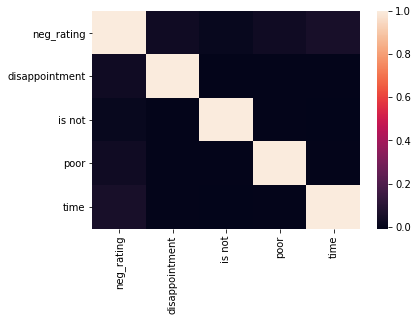

In [6]:
sns.heatmap(df.corr())
plt.show()    

In [7]:
data = df[keywords]
target = df['neg_rating']
 
 

In [8]:
#importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
#storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 490


### Loading Yelp file into model

In [9]:
# Loading Yelp file to test classifier
dfy = pd.read_csv('C:/Users/keith/Desktop/Thinkful/yelp_labelled.txt',sep='\t',header=None)
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
dfy.columns = ['reviews','neg_rating']
dfy = dfy[['neg_rating','reviews']]
dfy.head(5)

,neg_rating,reviews
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
4,1,The selection on the menu was great and so were the prices.


In [10]:
dfy['neg_rating'] = (dfy['neg_rating'] == 0)

In [11]:
data = df[keywords]
target = dfy['neg_rating']


In [12]:
#importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
#storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 497


### Feature engineering
Basically I skimmed the list of reviews for words and phrases that were common in negative reviews. I then built a list of those words.
keywords = ['disappointment', 'is not', 'poor', 'time', 'waste', 'really bad', 'if', 'doesnot', 'piece', 'horrible', 'terrible', 'disappointing', 'worst', 'expected', 'could not', 'get', 'wasting', 'problem', 'junk', 'was not]


### Feature selection
I removed each word/phrase one by one and then ran the classifier. I started with the words that correlated highly on the correlation heat map and them moved my way down.